In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# take reast_cancer dataset available in sklearn
X, y = load_breast_cancer(return_X_y=True)
# Split the dataset into training and test sets. By default, train_test_split splits the data into 75% training data and 25% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
clf = DecisionTreeClassifier(random_state=0)

In [4]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
# Predict the target labels for the training data using the trained classifier.
y_train_predicted = clf.predict(X_train)

In [6]:
y_test_predicted = clf.predict(X_test)

In [7]:
# Calculate and print the accuracy score for the training data predictions compared to the actual training labels.
accuracy_score(y_test, y_test_predicted)

0.8811188811188811

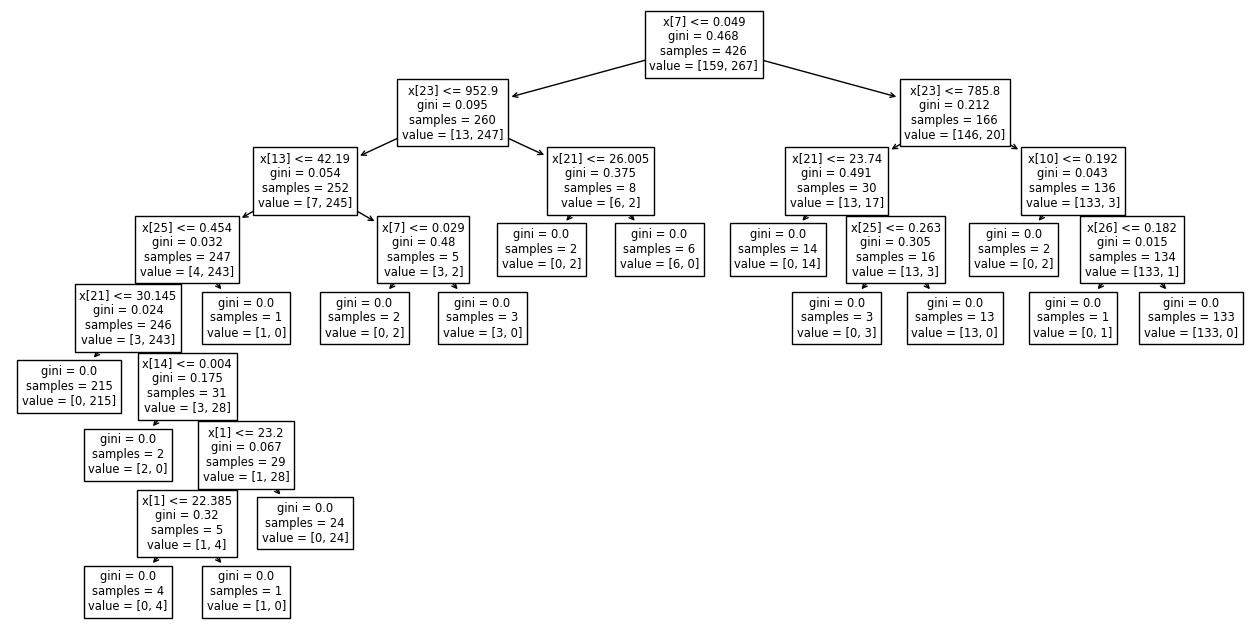

In [8]:
# Create a figure with a specified size for the Decision Tree visualization.
plt.figure(figsize=(16, 8))

# Use the tree.plot_tree function to visualize the Decision Tree classifier 'clf'.
tree.plot_tree(clf)

# Display the Decision Tree plot.
plt.show()

# Now we do post pruning opetration.
#we use cost_complexity_pruning technique to prune the branches of decision tree.

In [9]:
#we use cost_complexity_pruning technique to prune the branches of decision tree.
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp:",ccp_alphas)

ccp: [0.         0.00226647 0.00464743 0.0046598  0.0056338  0.00704225
 0.00784194 0.00911402 0.01144366 0.018988   0.02314163 0.03422475
 0.32729844]


In [10]:
print("Impurities in Decision Tree :",impurities)

Impurities in Decision Tree : [0.         0.00453294 0.01847522 0.02313502 0.02876883 0.03581108
 0.04365302 0.05276704 0.0642107  0.0831987  0.10634033 0.14056508
 0.46786352]


In [11]:
clfs = []  # will store all the models here
# Iterate through different values of 'ccp_alpha' in 'ccp_alphas'.
for ccp_alpha in ccp_alphas:
    # Create a Decision Tree classifier with a specified random state and the current 'ccp_alpha'.
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)

    # Fit the Decision Tree classifier to the training data.
    clf.fit(X_train, y_train)

    # Append the trained classifier to the 'clfs' list.
    clfs.append(clf)

# Print the information about the last node in the Decision tree



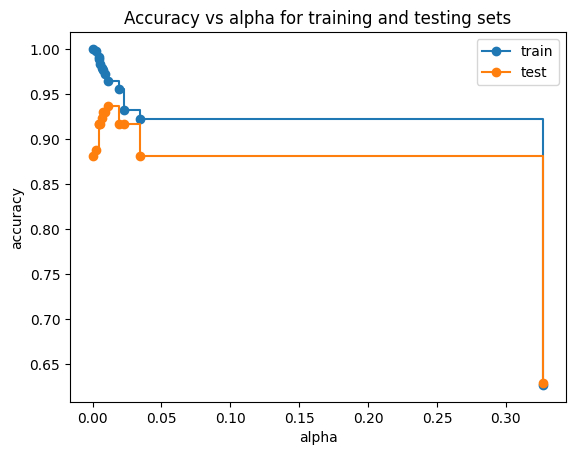

In [12]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

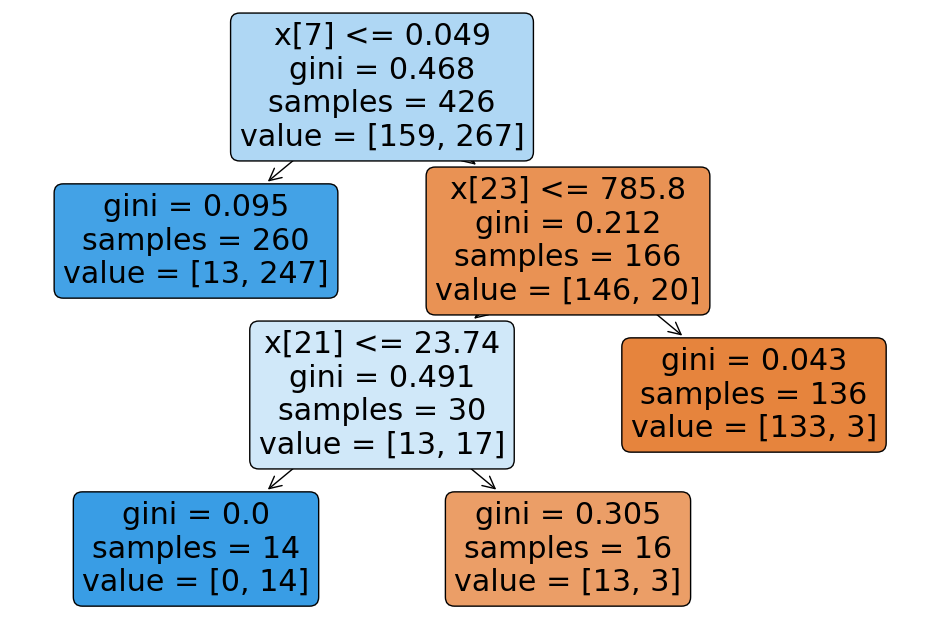

In [13]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
clf.fit(X_train,y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [14]:
accuracy_score(y_test, clf.predict (X_test))

0.916083916083916

# Prepruning

In [16]:
# Get the optimal parameters by hyperparameter tuning
# GridSearchCV
grid_param={"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,50,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1)
            }
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print(grid_search.best_params_)

In [ ]:
# Pre-Pruning Operation
clf=DecisionTreeClassifier(criterion= 'entropy',max_depth= 8,min_samples_leaf= 3,min_samples_split= 2,splitter= 'random')
clf.fit(X_train,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [ ]:
y_predicted=clf.predict(X_test)
accuracy_score(y_test,y_predicted)